# $Model$

## Using the titanic data:



### imports

In [1]:
# General DS Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import acquire
import prepare

np.random.seed(9)

In [2]:
# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

### Acquire

In [ ]:
titanic_df =acquire.new_titanic_data()

### Prepare

In [ ]:
titanic_df=prepare.prep_titanic(titanic_df)

In [ ]:
titanic_df.head()

In [ ]:
titanic_processing_df = titanic_df.drop(columns={'sex','class', 'embark_town'})

In [ ]:
titanic_processing_df.head()

In [ ]:
titanic_processing_df.columns

In [ ]:
# Splitting dataset into X and y components before doing the train/validate/test split
X = titanic_processing_df[['age', 'sibsp', 'parch', 'fare', 'alone', 'sex_male',
       'class_Second', 'class_Third', 'embark_town_Queenstown',
       'embark_town_Southampton']]

y = titanic_processing_df.survived

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [ ]:
X_train.shape, X_validate.shape,X_test.shape

In [ ]:
X_train, X_validate, X_test = prepare.impute_mean_age(X_train, X_validate, X_test)


In [ ]:
X_train.head()

In [ ]:
y_train.head()

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [ ]:
# set target variable survived baseline
baseline = y_train.mode()
baseline

In [ ]:
X_train['baseline_prediction'] = int(baseline)
X_train

In [ ]:
actual = y_train
predictions = X_train.baseline_prediction

In [ ]:
pd.crosstab(actual, predictions)

In [ ]:
print('baseline accuracy :',(298)/(200+298))

In [ ]:
X_train = X_train.drop(columns = ['baseline_prediction'])


In [ ]:
X_train.info()

### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [ ]:
# Create the decision tree object and specify hyperparams
tree_1 = DecisionTreeClassifier(max_depth = 5,min_samples_split = 5)

In [ ]:
tree_1.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_1, feature_names=X_train.columns.tolist()))

In [ ]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree_1.predict(X_train)

In [ ]:
# Visualize the tree
plt.figure(figsize=(12, 7))
plot_tree(tree_1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [ ]:
predictions = tree_1.predict(X_train)
actual = y_train

In [ ]:
pd.crosstab(actual, predictions)

In [ ]:
print(classification_report(actual, predictions))

### 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_predictions).ravel()
TN, FP, FN, TP 

In [ ]:
# create crosstab from tree_1 model after train
pd.crosstab(actual, predictions)

In [ ]:
# look at accuracy of tree_1 Model
print(classification_report(actual, predictions))

### Accuracy is 0.84 for tree_1 Model

### 5.Run through steps 2-4 using a different max_depth value.


In [ ]:
# Create the decision tree object and specify hyperparams
tree_2 = DecisionTreeClassifier(max_depth = 7,min_samples_split = 13)

In [ ]:
tree_2.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_2, feature_names=X_train.columns.tolist()))

In [ ]:
# model predictions using tree
tree_2.predict(X_train)

In [ ]:
predictions = tree_2.predict(X_train)
actual = y_train

In [ ]:
# create crosstab from tree_1 model after train
pd.crosstab(actual, predictions)

In [ ]:
# look at accuracy of tree_2 Model
print(classification_report(actual, predictions))

### Accuracy for tree_2 Model is 0.87

### 6. Which model performs better on your in-sample data?


Tree_2 Model performed slightly better by 3%.


### 7. Which model performs best on your out-of-sample data, the validate set?

In [ ]:
predictions = tree_1.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

In [ ]:
predictions = tree_2.predict(X_validate)
actual = y_validate

print(classification_report(actual, predictions))

### In terms of accuracy tree_1 Model performed better by 5%.

# Test Data

In [ ]:
predictions = tree_1.predict(X_test)
actual = y_test

print(classification_report(actual, predictions))

### Tree_1 Model had an 83% accuracy in test data

# Work through these same exercises using the Telco dataset.
## Experiment with this model on other datasets with a higher number of output classes.

### Acquire

In [3]:
telco_df =acquire.new_telco_data()

In [4]:
telco_df=prepare.prep_telco(telco_df)

In [5]:
telco_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,0,1,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,1,0,0,1,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,1,0,0,0,1,0,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,0,0,1,0,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,1,0,0,0,0,1


In [6]:
telco_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_Female', 'gender_Male', 'partner_No',
       'partner_Yes', 'dependents_No', 'dependents_Yes', 'phone_service_No',
       'phone_service_Yes', 'multiple_lines_No',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No',
       'tech_support_No internet service', 'tech_support_Yes',
       

In [7]:
telco_process = telco_df.drop(columns={'customer_id','gender','partner',
                                    'dependents',
                                    'phone_service',
                                    'multiple_lines',
                                    'online_security',
                                    'online_backup',
                                    'device_protection', 
                                    'tech_support',
                                    'streaming_tv',
                                    'streaming_movies',
                                    'paperless_billing',  
                                    'contract_type',
                                    'internet_service_type',
                                    'payment_type',
                                      'churn',
                                       'churn_No'})

In [8]:
telco_process.columns.to_list()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_No',
 'paperless_billing_Yes',
 'churn_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_servic

In [9]:
# drop customer_id,gender,  
telco_process.dtypes 

senior_citizen                              int64
tenure                                      int64
monthly_charges                           float64
total_charges                             float64
gender_Female                               uint8
gender_Male                                 uint8
partner_No                                  uint8
partner_Yes                                 uint8
dependents_No                               uint8
dependents_Yes                              uint8
phone_service_No                            uint8
phone_service_Yes                           uint8
multiple_lines_No                           uint8
multiple_lines_No phone service             uint8
multiple_lines_Yes                          uint8
online_security_No                          uint8
online_security_No internet service         uint8
online_security_Yes                         uint8
online_backup_No                            uint8
online_backup_No internet service           uint8


In [10]:
telco_process.shape

(7043, 46)

In [11]:
# Splitting dataset into X and y components before doing the train/validate/test split
X = telco_process[['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'gender_Female',
 'gender_Male',
 'partner_No',
 'partner_Yes',
 'dependents_No',
 'dependents_Yes',
 'phone_service_No',
 'phone_service_Yes',
 'multiple_lines_No',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'paperless_billing_No',
 'paperless_billing_Yes',
 'contract_type_Month-to-month',
 'contract_type_One year',
 'contract_type_Two year',
 'internet_service_type_DSL',
 'internet_service_type_Fiber optic',
 'internet_service_type_None',
 'payment_type_Bank transfer (automatic)',
 'payment_type_Credit card (automatic)',
 'payment_type_Electronic check',
 'payment_type_Mailed check']]

y = telco_process.churn_Yes

X_train_and_validate, X_test, y_train_and_validate, y_test = train_test_split(X, y, random_state=123, test_size=.3)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_and_validate, y_train_and_validate, random_state=123, test_size=.2)

In [12]:
X_train, X_validate, X_test = prepare.impute_mean_total_charges(X_train, X_validate, X_test)

In [13]:
X_train.shape, X_validate.shape,X_test.shape

((3944, 45), (986, 45), (2113, 45))

In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3944 entries, 1853 to 6105
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          3944 non-null   int64  
 1   tenure                                  3944 non-null   int64  
 2   monthly_charges                         3944 non-null   float64
 3   total_charges                           3944 non-null   float64
 4   gender_Female                           3944 non-null   uint8  
 5   gender_Male                             3944 non-null   uint8  
 6   partner_No                              3944 non-null   uint8  
 7   partner_Yes                             3944 non-null   uint8  
 8   dependents_No                           3944 non-null   uint8  
 9   dependents_Yes                          3944 non-null   uint8  
 10  phone_service_No                        3944 non-null   u

In [15]:
X_train.head(), y_train.head()

(      senior_citizen  tenure  monthly_charges  total_charges  gender_Female  \
 1853               0       5            20.55          99.45              0   
 469                1       2            70.75         154.85              1   
 1062               0      32            84.15        2585.95              1   
 260                0      46            19.40         967.85              1   
 6529               0       3            54.70         169.45              0   
 
       gender_Male  partner_No  partner_Yes  dependents_No  dependents_Yes  \
 1853            1           0            1              0               1   
 469             0           1            0              1               0   
 1062            0           0            1              1               0   
 260             0           0            1              0               1   
 6529            1           1            0              0               1   
 
       ...  contract_type_Month-to-month  contra

### 1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [16]:
# 0 is the largest value count which represents customers who have not churn
y_train.value_counts()[0]

2887

In [17]:
baseline = y_train.value_counts()[0]/(y_train.value_counts()[0]+y_train.value_counts()[1])
print('baseline accuracy:',baseline)

baseline accuracy: 0.7319979716024341


### 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [18]:
# Create the decision tree object and specify hyperparams
tree_1 = DecisionTreeClassifier(max_depth = 3,min_samples_split = 5)

tree_1.fit(X_train, y_train)

# Rudimentary visualization of model structure
print(export_text(tree_1, feature_names=X_train.columns.tolist()))

|--- contract_type_Month-to-month <= 0.50
|   |--- monthly_charges <= 94.08
|   |   |--- online_security_No <= 0.50
|   |   |   |--- class: 0
|   |   |--- online_security_No >  0.50
|   |   |   |--- class: 0
|   |--- monthly_charges >  94.08
|   |   |--- contract_type_One year <= 0.50
|   |   |   |--- class: 0
|   |   |--- contract_type_One year >  0.50
|   |   |   |--- class: 0
|--- contract_type_Month-to-month >  0.50
|   |--- internet_service_type_Fiber optic <= 0.50
|   |   |--- tenure <= 5.50
|   |   |   |--- class: 0
|   |   |--- tenure >  5.50
|   |   |   |--- class: 0
|   |--- internet_service_type_Fiber optic >  0.50
|   |   |--- total_charges <= 1536.33
|   |   |   |--- class: 1
|   |   |--- total_charges >  1536.33
|   |   |   |--- class: 0



In [19]:
# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree_1.predict(X_train)

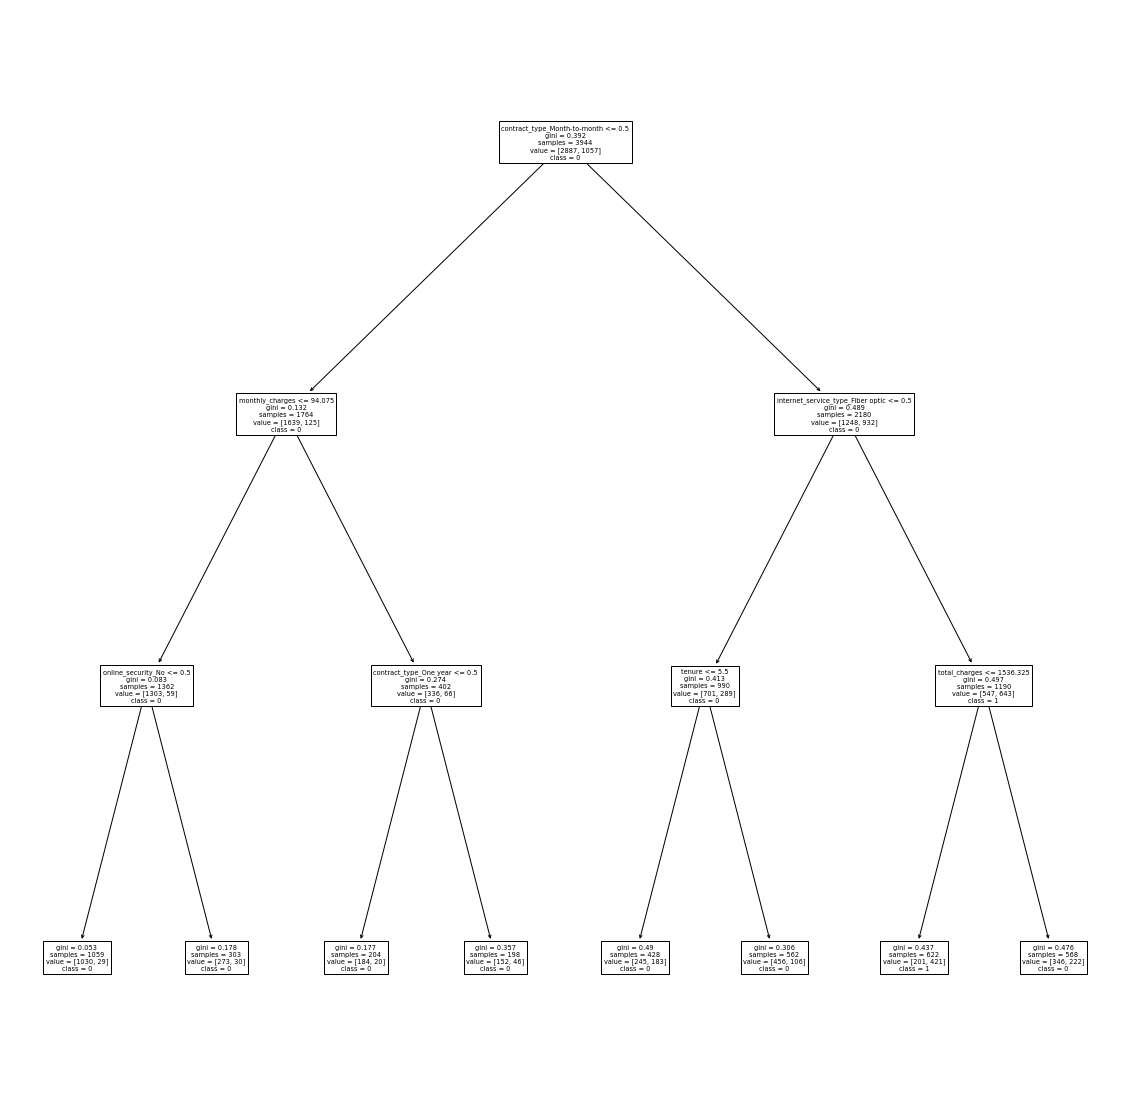

In [23]:
# Visualize the tree
plt.figure(figsize=(20, 20))
plot_tree(tree_1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

### 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [26]:
print(tree_1.score(X_train, y_train))

0.7877789046653144


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


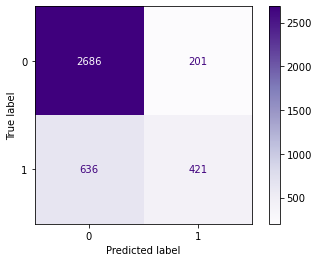

In [38]:
plot_confusion_matrix(tree_1, X_train, y_train, cmap='Purples')

In [39]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2887
           1       0.68      0.40      0.50      1057

    accuracy                           0.79      3944
   macro avg       0.74      0.66      0.68      3944
weighted avg       0.77      0.79      0.77      3944



In [ ]:
# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)